In [1]:
%matplotlib inline

# Head First Statistics

## by Dawn Griffiths

### Copyright © 2009 O’Reilly Media, Inc. All rights reserved.

### ISBN: 978-0-596-52758-7

# Chapter 1 visualizing information
## First Impressions
### Part 2: histograms, cumulative frequency graphs & Line charts

## Histograms
The data we have expressed in bar charts are devided into categories. But what if we have numerical intervals linked to frequencies, e.g. score ranges and the frequencies of scores within these ranges.

| Score range | Frequency |
| ----------: | --------: |
|       0-199 |         5 |
|     200-399 |        29 |
|     400-599 |        56 |
|     600-799 |        17 |
|     800-999 |         3 |

We could make the score ranges into categories and make a bar chart from this or we could make a **histogram**

### Rules for histograms
- using a continuous numeric scale to represent the intervals, i.e. the scores on one axis
    - therefore their are no gaps between the bars
- using a continuous numeric scale to represent either the frequency or the frequency *density* on the other axis
    - the frequency is always proportional to the area of each bar
        - when the intervals all are of equal width, we can express the height as the frequency
        - when the intervals are of different width, we should express the height as the frequency *density*
        
### Making a histogram
-  look at each of the intervals and work out how wide each of them needs to be, and what range of values each one needs to cover.
- Histograms shouldn’t have gaps between the bars, therefore we extend their ranges slightly
    - e.g. the ranges 0-199 and 200-399 will meet at 199.5
    
#### In this example of score frequencies
- Each interval covers 200 scores, and the width of each interval is 200. Each interval has the same width.
- As all the intervals have the same width, we create the histogram by drawing vertical bars for each range of scores, using the boundaries to form the start and end point of each bar. In this case, the height of each bar can be equal to the frequency.

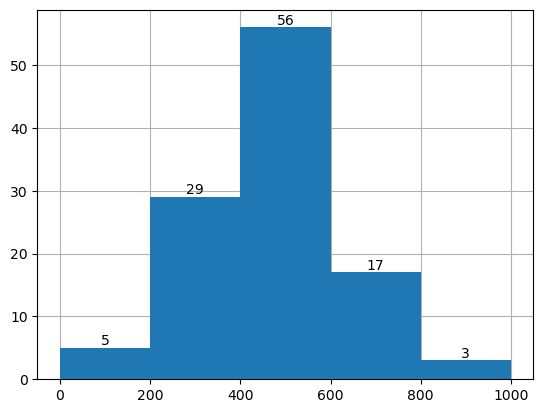

In [2]:
# Still using a matplotlib bar plot to mimick the form of a histogram
# in this simple case
import matplotlib.pyplot as plt
frequencies = [5, 29, 56, 17, 3]
intervals = ((0,199),(200, 399),(400,599),(600,799),(800,999))

# In this case we use the middle values of the intervals as the x
x = [100, 300, 500, 700, 900]

# and still the simple bar chart function
# with the x and frequencies arrays as first and second argument and
# the interval width as width keyword argument
bar = plt.bar(x, frequencies, width=200, zorder=3)
plt.grid(zorder=0)
plt.bar_label(bar) # adding the frequency values of the BarContainer as labels
plt.show()

### Note: matplotlib.pyplot expects raw input for their histograms
The book gives us summary data of frequencies per interval, but the histogram interface expects raw data, i.e. a large collection of individual scores. These can then be fed into a histogram where bucketsizes determine how wide the score value intervals (and width that the width of the bars) should be.

## Cumulative frequency chart

The total frequency up to certain value. It’s basically a running total of the frequencies.


### Example: data of the frequency of players playing for a certain amount of time devided in certain intervals
The data:

| Hours | Frequency |
| ----- | --------- |
| 0-1   | 4300      |
| 1-3   | 6900      |
| 3-5   | 4900      |
| 5-10  | 2000      |
| 10-24 | 2100      |

We now need to calculate the cumulative frequencies for each of the intervals and work out the upper limit (here max number of hours) of each interval.


| Hours | Frequency | Upper Limit | Cumalitive Frequency |
| ----- | --------- | ----------- | --------------------- |
| 0     | 0         | 0           | 0                     |
| 0-1   | 4300      | 1           | 4300                  |
| 1-3   | 6900      | 3           | 4300 + 6900 = 11200   |
| 3-5   | 4900      | 5           | 11200 + 4900 = 16100  |
| 5-10  | 2000      | 10          | 16100 + 2000 = 18100  |
| 10-24 | 2100      | 24          | 18100 + 2100 = 20200  |

### Drawing the cumulative frequency graph
This is basically a line plot with the acumulative frequency on the y axis and the upper limit hours at the x axis.

type(colors)=<class 'list'>, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
The marked coordinates are  (4, 13650)


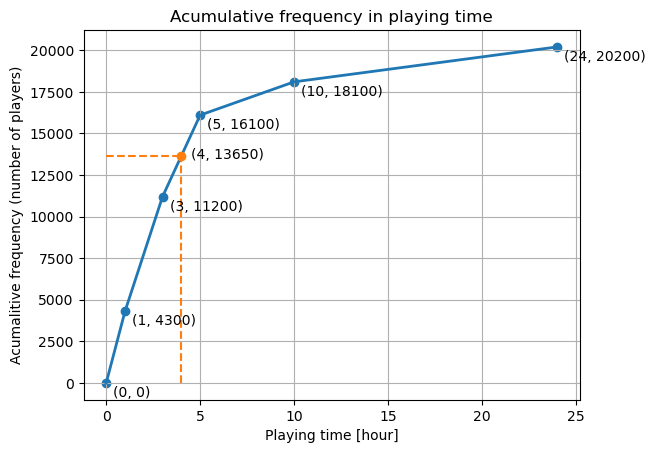

In [3]:
import numpy as np

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
print(f"type(colors)={type(colors)}, colors={colors}")

# data, the (x,y) coordinates are a combination of the elements of both lists at the same index position
x = [0, 1, 3, 5, 10, 24] # The upper limit
y = [0, 4300, 11200, 16100, 18100, 20200] # The cumalitive frequency
figure, axes = plt.subplots()

# Add captions to the diagram and its axes
axes.set_title('Acumulative frequency in playing time')
axes.set_ylabel('Acumalitive frequency (number of players)')
axes.set_xlabel('Playing time [hour]')

# Add grid,
# the zorder keyword argument will help for the grid to be behind the bars
axes.grid(zorder=0)


plt.scatter(x,y)
plt.plot(x, y, linewidth=2.0, zorder=3)

# annotate 
for i, item in enumerate(y):
    axes.annotate(f"({x[i]}, {item})", (x[i], item), xytext=(5, -10), textcoords='offset points')


# Question: What cumalitive frequency corresponds with up to 4 hours playing time?
# 
marked_x = 4 # playing time limit that you want to look up the acumulated frequency for
marked_y = np.interp(marked_x, x,y) # the acumulated frequency corresponding to the 4 hour limit

# create a scatter point to the marked coordinates:

# see https://stackoverflow.com/questions/45310254/fixed-digits-after-decimal-with-f-strings
annotation_to_marked = f"({marked_x}, {marked_y:.0f})" # formatting with no decimals 
plt.scatter(marked_x, marked_y, zorder=4)

# plot a line from the x axis to the marked coordinates
plt.plot([marked_x, marked_x], [0, marked_y], zorder=2, linestyle='dashed')

# plot the line from the y axis to the marked coordinates
# and make sure it has the same color as the previous line and the scatter point (the second element from colors)
plt.plot([0, marked_x], [marked_y, marked_y], zorder=2, linestyle='dashed', color=colors[1])

# annotate
axes.annotate(annotation_to_marked, (marked_x, marked_y), xytext=(7, -2), textcoords='offset points')
print("The marked coordinates are ", annotation_to_marked)
plt.show()

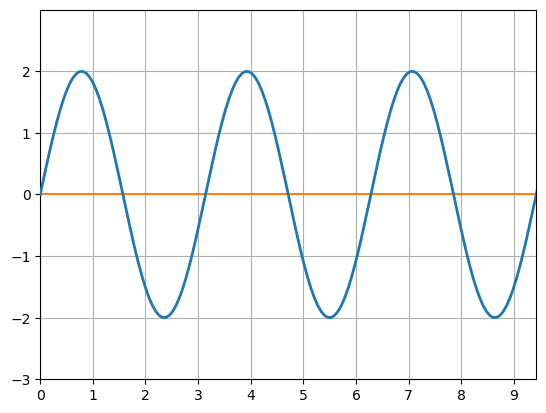

In [4]:
# make data
x = np.linspace(0, 4 * np.pi, 201)
y = 2 * np.sin(2 * x)

# plot
fig, ax = plt.subplots()

# Add grid,
# the zorder keyword argument will help for the grid to be behind the bars
ax.grid(zorder=0)

ax.plot(x, y, linewidth=2.0, zorder=3) # plot the function
ax.plot([0, 3 * np.pi], [0,0], zorder=2) # plot the x-axis

ax.set(xlim=(0, 3 * np.pi), xticks=np.arange(0, 3 * np.pi),
       ylim=(-3, 3), yticks=np.arange(-3, 3))



plt.show()

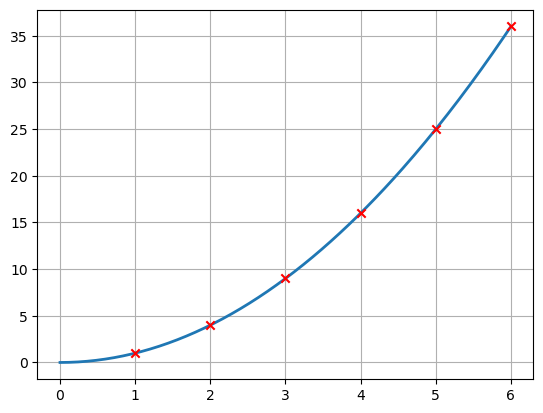

In [5]:
# make data
x_scatter = [1, 2, 3, 4, 5, 6]
y_scatter = [1, 4, 9, 16, 25, 36] # the corresponding x**2

# Return evenly spaced numbers over a specified interval.
x = np.linspace(0, 6, 201)
y = np.lib.scimath.power(x, 2)

# plot
fig, ax = plt.subplots()

# Add grid,
# the zorder keyword argument will help for the grid to be behind the bars
ax.grid(zorder=0)

ax.plot(x, y, linewidth=2.0, zorder=3) # plot the function
ax.scatter(x_scatter, y_scatter, marker='x', color='red', zorder=4)


plt.show()

<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


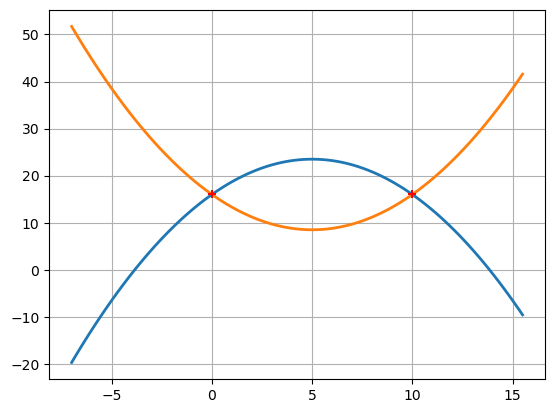

In [6]:
# Return evenly spaced numbers over a specified interval.
x_array = np.linspace(-7, 15.5, 100)


# parabola function as lambda expression with the x_array as input
y_list = list((lambda x: -0.3*x**2 + 3*x + 16)(x_array))

# slightly different parabola function as expression in list comprehension on the same x_array
y_list2 = [0.3*x**2 - 3*x + 16 for x in x_array] 
print(type(y_list))
print(type(y_list2))
y_array = np.array(y_list) # also necessary to convert to a numpy array
y_array2 = np.array(y_list2) # also necessary to convert to a numpy array
print(type(x))
print(type(y_array))

# plot
fig, ax = plt.subplots()

# Add grid,
# the zorder keyword argument will help for the grid to be behind the bars
ax.grid(zorder=0)

ax.plot(x_array, y_array, linewidth=2.0, zorder=3)
ax.plot(x_array, y_array2, linewidth=2.0, zorder=3)
ax.scatter([0,10],[16,16], marker="+", color="red", zorder=4) # plot the intersections

plt.show()